In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
from sklearn.datasets import make_moons

In [9]:
autompg_data="https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

In [14]:
auto_data= pd.read_csv(autompg_data, header=None, sep='\s+', na_values="?")
auto_data.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [16]:
var_names =['mpg', 'cyl','disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'brand']

In [17]:
auto_data.columns = var_names

In [18]:
from sklearn.mixture import GaussianMixture

In [22]:
d1 = auto_data.dropna().iloc[:,:6]

In [23]:
d1.shape

(392, 6)

In [24]:
d1.describe()

,mpg,cyl,disp,hp,wt,acc
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sd= StandardScaler()

In [34]:
d1_mat = sd.fit_transform(d1)

In [35]:
pd.DataFrame(d1_mat).describe()

,0,1,2,3,4,5
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-1.840931e-16,-1.699321e-16,-2.537653e-16,-4.392745e-16,5.607759e-17,6.117555e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.853218e+00,-1.451004e+00,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.269250e-01,-8.640136e-01,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-8.927701e-02,-8.640136e-01,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.125143e-01,1.483947e+00,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.970359e+00,1.483947e+00,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


C:\IDE\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\IDE\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\IDE\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms)

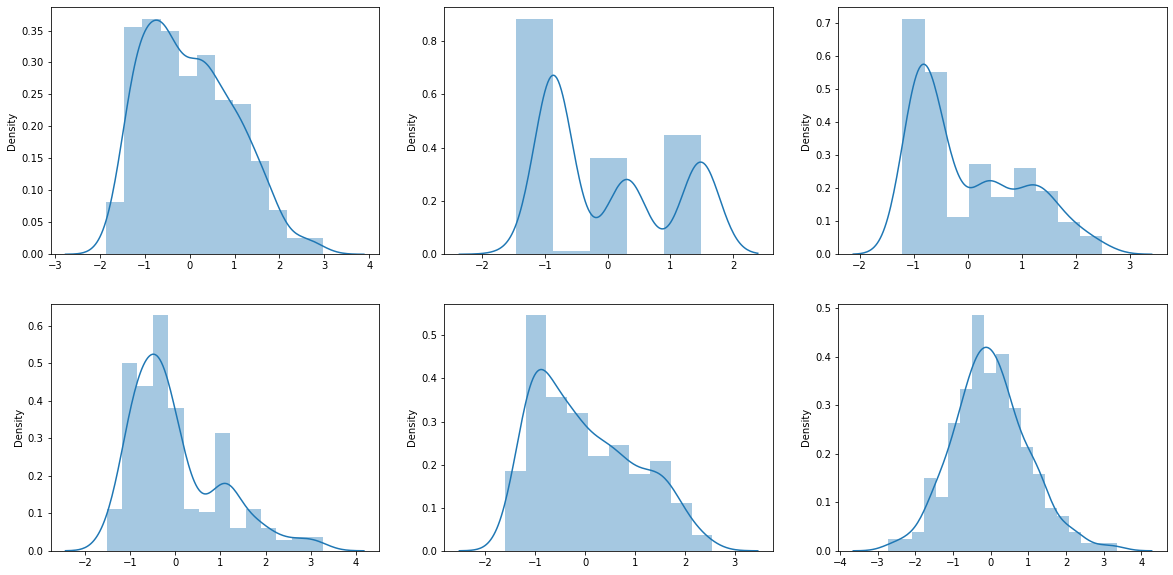

In [43]:
plt.figure(figsize=(20,10))
for i in range(1,7):
    plt.subplot(2,3,i)
    sns.distplot(d1_mat[:,i-1])

In [ ]:
#Doing PCA as it reduces the no of parmeters


In [46]:
bic_scores =[]
for clus in range(2,21):
    gmm = GaussianMixture(n_components=clus)
    gmm.fit(d1_mat)
    bic=  gmm.bic(d1_mat)
    bic_scores.append(bic)

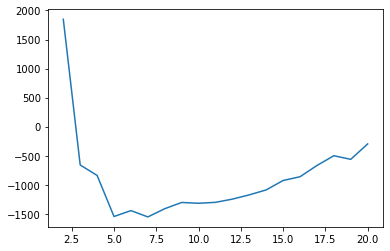

In [48]:
plt.plot(range(2,21), bic_scores)

In [56]:
list(range(2,21))[np.argmin(np.array(bic_scores))]

7

In [60]:

gmm_4  = GaussianMixture(n_components=4)
gmm_4.fit(d1_mat)

GaussianMixture(n_components=4)

In [61]:
gmm_4.predict(d1_mat)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0,
       3, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3,
       0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 0, 0,

In [62]:
all_prob = gmm_4.predict_proba(d1_mat)

In [63]:
all_prob

array([[0.00000000e+000, 1.00000000e+000, 7.50857995e-079,
        0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 2.57598960e-082,
        0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 7.17641876e-080,
        0.00000000e+000],
       ...,
       [1.00000000e+000, 0.00000000e+000, 4.66591378e-086,
        1.57226475e-018],
       [1.00000000e+000, 0.00000000e+000, 1.13664531e-080,
        1.00572972e-311],
       [1.00000000e+000, 0.00000000e+000, 3.84026001e-083,
        0.00000000e+000]])

In [132]:
#To find the uncertainity
unceratinity = (1-all_prob.max(axis=1))*100 +4.5
unceratinity

array([4.5       , 4.5       , 4.5       , 4.5       , 4.5       ,
       4.5       , 4.5       , 4.5       , 4.5       , 4.5       ,
       4.5       , 4.5       , 4.5       , 4.5       , 4.5       ,
       4.5       , 4.5       , 4.5       , 4.5       , 4.5       ,
       4.5       , 4.5       , 4.5       , 4.5       , 4.5       ,
       4.5       , 4.5       , 4.5       , 4.5       , 4.5       ,
       4.5       , 4.5       , 4.5       , 4.5       , 4.5       ,
       4.5       , 4.5       , 4.5       , 4.5       , 4.5       ,
       4.5       , 4.5       , 4.5       , 4.5       , 4.5       ,
       4.5       , 4.5       , 4.5       , 4.5       , 4.5000407 ,
       4.5       , 4.5       , 4.5       , 4.5       , 4.5       ,
       4.5       , 4.5       , 4.5       , 4.5       , 4.5       ,
       4.5       , 4.5       , 4.5       , 4.5       , 4.5       ,
       4.5       , 4.5       , 4.5       , 4.5       , 4.5       ,
       4.5       , 4.5       , 4.5       , 4.5       , 4.5    

In [133]:
d1_mat_df = pd.DataFrame(d1_mat, columns=var_names[:6])
d1_mat_df.head()

,mpg,cyl,disp,hp,wt,acc
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655


In [134]:
d1_mat_df['unceratinity'] = unceratinity

In [135]:
from sklearn.manifold import TSNE

In [136]:
tsne =TSNE()

In [137]:
tsne_mat = tsne.fit_transform(d1_mat_df.iloc[:,:6])

In [138]:
#tsne_mat 

<AxesSubplot:>

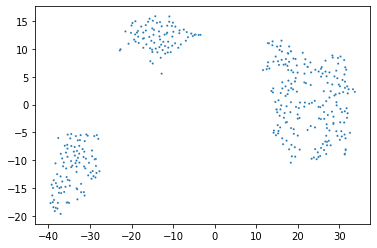

In [139]:
sns.scatterplot(x = tsne_mat[:,0], y=tsne_mat[:,1], s=d1_mat_df['unceratinity'] )

In [126]:
#PCA
from sklearn.decomposition import PCA

In [127]:
pca = PCA(n_components=2)

In [128]:
pca_mat = pca.fit_transform(d1_mat)

<AxesSubplot:>

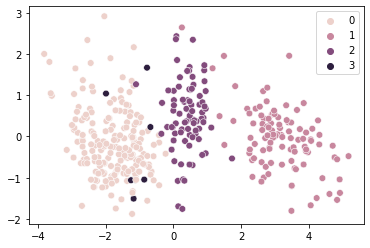

In [129]:
sns.scatterplot(x = pca_mat[:,0], y=pca_mat[:,1], s=d1_mat_df['unceratinity'] *10, hue = gmm_4.predict(d1_mat))